
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
 ad_data=pd.read_csv('advertising.csv')


**Check the head**

In [4]:
 ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Get the info**

In [5]:
 ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


**Check for missing values**

In [6]:
 ad_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**Get descriptive statistics**

In [7]:
 ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

<AxesSubplot:>

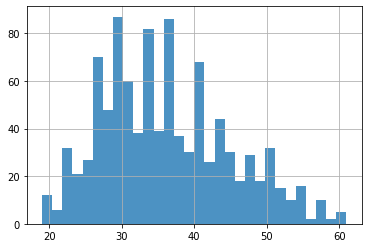

In [8]:
  ad_data['Age'].hist(bins=30,alpha=0.8)

**Create a jointplot showing Area Income versus Age.**

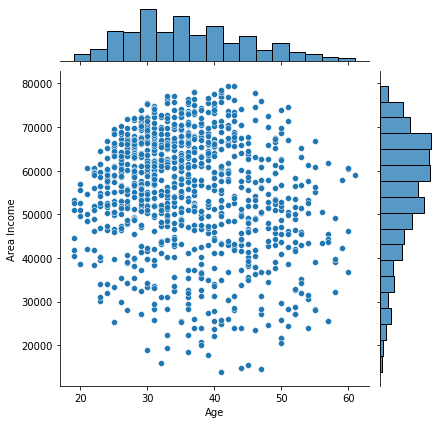

In [9]:
 sns.jointplot(x='Age',y='Area Income',data=ad_data,kind='scatter')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

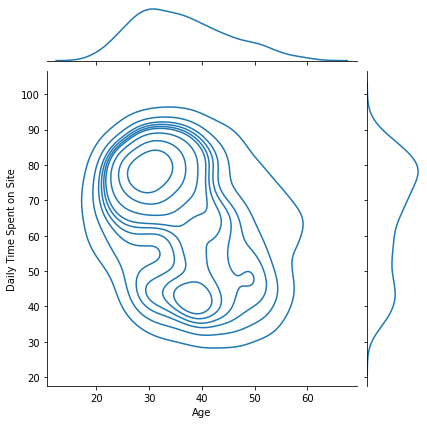

In [10]:
   sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

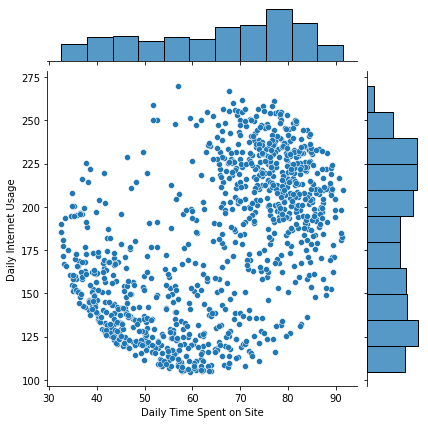

In [11]:
 sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

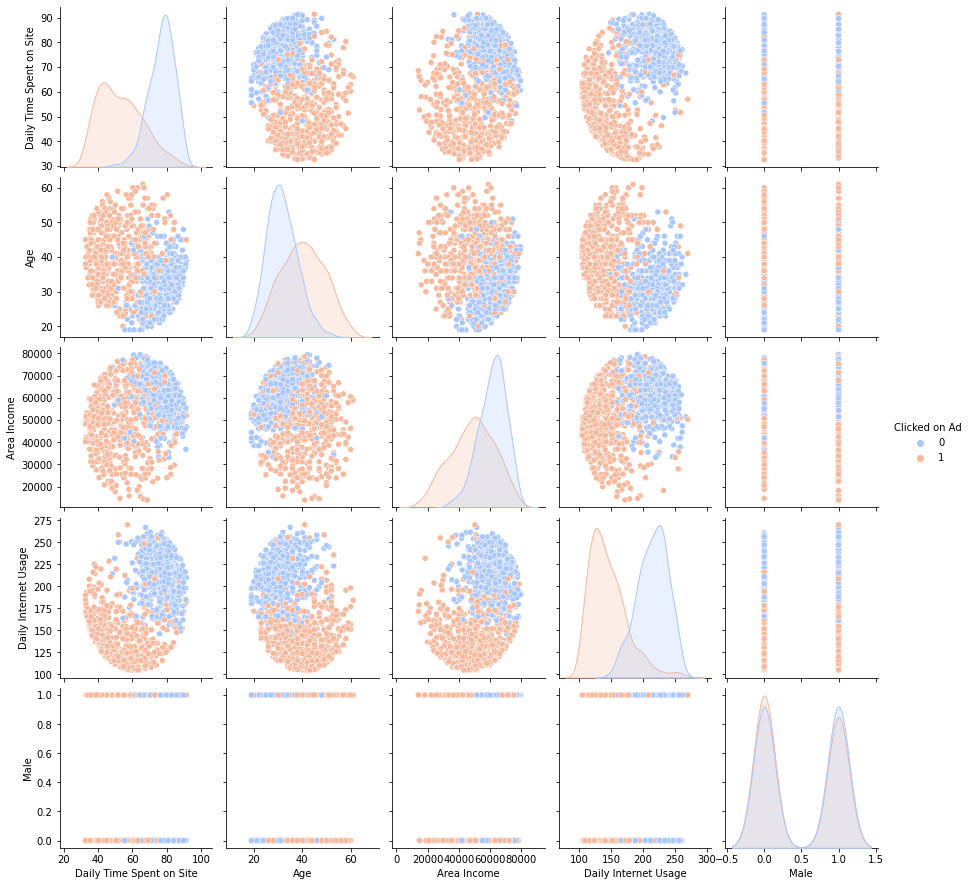

In [12]:
 sns.pairplot(ad_data,hue='Clicked on Ad',palette='coolwarm')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Divide x & y**

In [13]:
x=ad_data.loc[:,['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']].values
y=ad_data.iloc[:,-1].values

**Split the data into training set and testing set using train_test_split**


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

**Train and fit a logistic regression model on the training set.**

In [15]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

**Get the Confusion Matrix and Accuracy**

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f'Confusion_matrix:-\n {confusion_matrix(ytest,ypred)}')
print(f'Accuracy:- {accuracy_score(ytest,ypred)}')

Confusion_matrix:-
 [[155   9]
 [ 16 120]]
Accuracy:- 0.9166666666666666


**Get the Classification Report**

In [17]:
print(f'Classification_Report:-\n {classification_report(ytest,ypred)}')

Classification_Report:-
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       164
           1       0.93      0.88      0.91       136

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300



**Get the Mean Accuracy and Standard Deviation of the model**

In [18]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(logreg,xtrain,ytrain,cv=5)
print(f'Accuracy: {cvs.mean()*100} \n Standard Deviation: {cvs.std()*100}\n\n')

Accuracy: 90.99999999999999 
 Standard Deviation: 2.539484119233024


